In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tomatoleaf/tomato/cnn_train.py
/kaggle/input/tomatoleaf/tomato/val/Tomato___Late_blight/0db85707-41f9-42df-ba3b-842d14f00a68___GHLB2 Leaf 8909.JPG
/kaggle/input/tomatoleaf/tomato/val/Tomato___Late_blight/0fca6d09-1931-4767-a195-1dd2b7cd10b7___GHLB Leaf 8 Day 12.JPG
/kaggle/input/tomatoleaf/tomato/val/Tomato___Late_blight/Tomato___Late_blight_original_0ba7d3d8-5c4c-4365-ba0c-69f61e96a36e___RS_Late.B 5312.JPG_0c8b3e88-9afa-41e1-a767-122ad7b27ac2.JPG
/kaggle/input/tomatoleaf/tomato/val/Tomato___Late_blight/1b212ad6-e65a-4467-bfd1-9f9139070d33___GHLB2 Leaf 8609.JPG
/kaggle/input/tomatoleaf/tomato/val/Tomato___Late_blight/1d6d043a-9df9-49ec-9b0f-e40a8e7f409f___RS_Late.B 5287.JPG
/kaggle/input/tomatoleaf/tomato/val/Tomato___Late_blight/1d83eef4-92a0-42a2-9ea7-1ec2e683dbc0___GHLB2 Leaf 8809.JPG
/kaggle/input/tomatoleaf/tomato/val/Tomato___Late_blight/01ebf21e-ef94-4c92-b007-0b26741c2fc8___GHLB2 Leaf 9075.JPG
/kaggle/input/tomatoleaf/tomato/val/Tomato___Late_blight/1f38a263-cfb5-

In [33]:
# Data manipulation & Visualization Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
#!pip install --upgrade keras
#!pip install --upgrade tensorflow


In [41]:
import tensorflow as tf

#dl libraraies
from tensorflow.keras import layers
from tensorflow.keras import Model

from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.utils import img_to_array, load_img
from tensorflow.keras.applications.inception_v3 import InceptionV3

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation,Dense
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import Sequential


import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [37]:
train_dir = "/kaggle/input/tomatoleaf/tomato/train"
validation_dir = "/kaggle/input/tomatoleaf/tomato/val"

In [38]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
    train_datagen = ImageDataGenerator(rescale=1./255.,
                                      rotation_range = 40,
                                      width_shift_range = 0.2,
                                      height_shift_range = 0.2,
                                      shear_range = 0.2,
                                      zoom_range = 0.2,
                                      horizontal_flip = True)
    
    train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                        batch_size=32, 
                                                        class_mode='categorical',
                                                        target_size=(150, 150))
    
    validation_datagen = ImageDataGenerator(rescale=1./255.)
    validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                  batch_size=32, 
                                                                  class_mode='categorical',
                                                                  target_size=(150, 150))
    return train_generator, validation_generator

train_generator, validation_generator = train_val_generators(train_dir, validation_dir)


Found 10000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


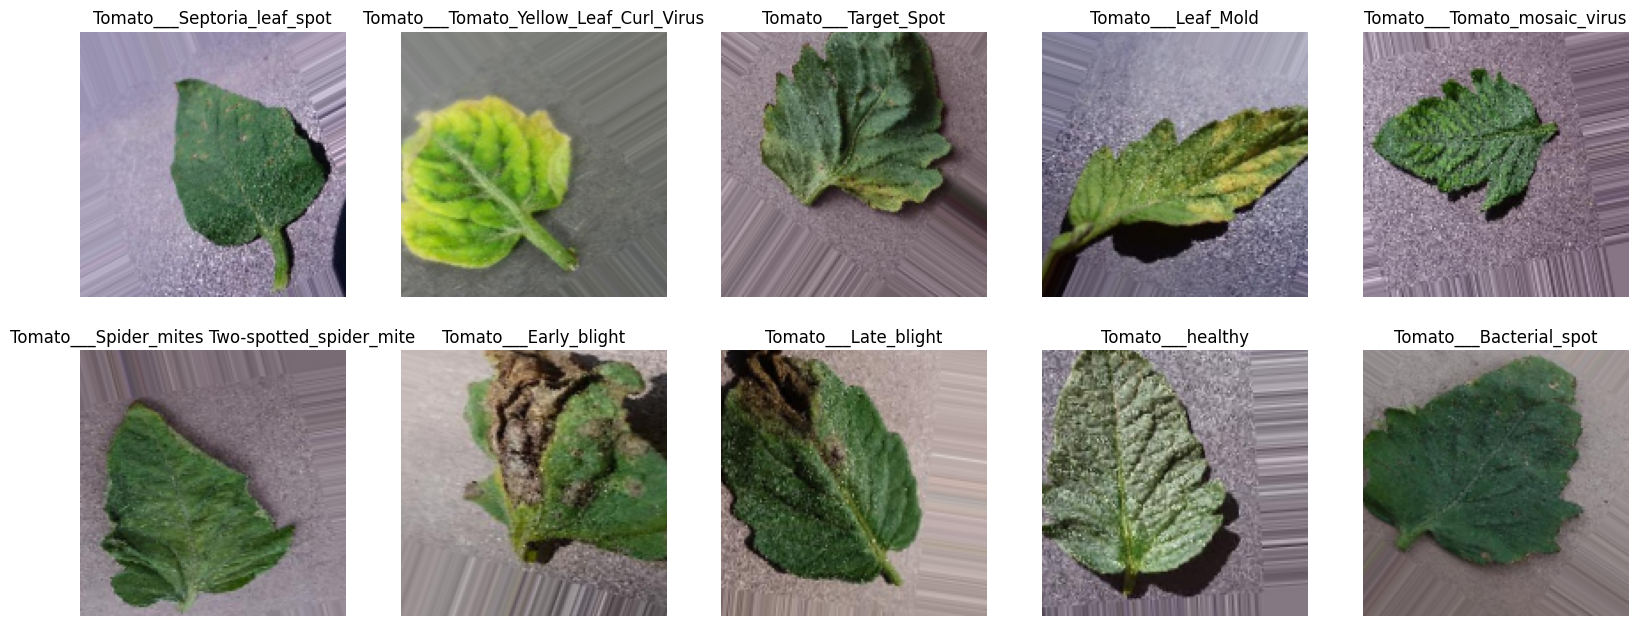

In [39]:
class_indices = train_generator.class_indices
class_labels = {v: k for k, v in class_indices.items()}

plt.figure(figsize=(20, 20))

visited_classes = set()

for images, labels in train_generator:
    for i in range(len(labels)):
        label_index = np.argmax(labels[i])
        if label_index not in visited_classes:
            plt.subplot(5, 5, len(visited_classes) + 1)
            plt.imshow(images[i])
            plt.title(class_labels[label_index])
            plt.axis('off')
            visited_classes.add(label_index)
        if len(visited_classes) == len(class_labels):
            break
    if len(visited_classes) == len(class_labels):
        break

plt.show()

In [42]:
model = Sequential()

# Flatten layer does not need input_shape when followed by Conv2D
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))  # Corrected Dense layer syntax

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.summary() 


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 72, 72, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 36, 36, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 34, 34, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 17, 17, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2312)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       296,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 304,034 (1.16 MB)

 Trainable params: 304,034 (1.16 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')>0.860):
          print("\nReached 85.0% val_accuracy so cancelling training!")
          self.model.stop_training = True

In [44]:
callbacks = myCallback()
history = model.fit(train_generator,validation_data = validation_generator,epochs = 100,verbose = 1,callbacks=callbacks,)

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 95s 285ms/step - accuracy: 0.1816 - loss: 2.1490 - val_accuracy: 0.3190 - val_loss: 1.7297
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 67s 210ms/step - accuracy: 0.4001 - loss: 1.6661 - val_accuracy: 0.5180 - val_loss: 1.2858
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 66s 206ms/step - accuracy: 0.5843 - loss: 1.1792 - val_accuracy: 0.5880 - val_loss: 1.1480
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 68s 212ms/step - accuracy: 0.6421 - loss: 1.0141 - val_accuracy: 0.6600 - val_loss: 1.0211
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 66s 205ms/step - accuracy: 0.6859 - loss: 0.8757 - val_accuracy: 0.6760 - val_loss: 0.9475
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 65s 202ms/step - accuracy: 0.7007 - loss: 0.8196 - val_accuracy: 0.7630 - val_loss: 0.6909
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 66s 206ms/step - accuracy: 0.7114 - loss: 0.8005 - val_accuracy: 0.7110 - val_loss: 0.8249
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 66s 205ms/step - accuracy: 0.7466 -

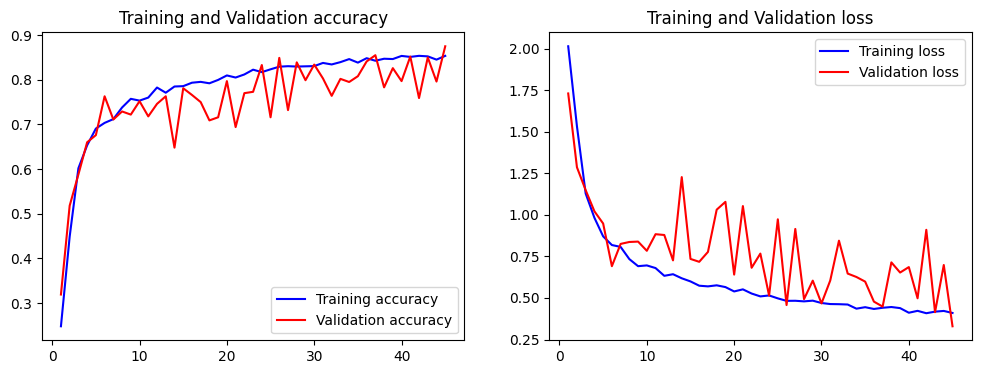

In [45]:
def plot_performance(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and Validation accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and Validation loss')
    plt.legend()

    plt.show()

# Call the function with the training history
plot_performance(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


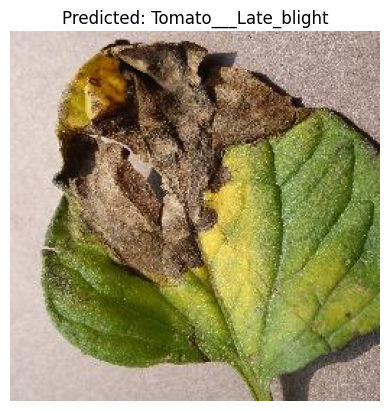

In [48]:
def predict_image(image_path, model):
    # Load and preprocess the image
    img = load_img(image_path, target_size=(150, 150))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    
    # Make the prediction
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=-1)
    return predicted_class[0]

def get_class_label(predicted_class, index_to_class):
    return index_to_class[predicted_class]

def visualize_prediction(image_path, predicted_class_label):
    # Load the image (original size) for visualization
    img = load_img(image_path)
    plt.imshow(img)
    
    # Set the title with the predicted label
    plt.title(f"Predicted: {predicted_class_label}")
    plt.axis('off')
    
    # Display the image
    plt.show()

# Example usage
image_path = "/kaggle/input/tomatoleaf/tomato/val/Tomato___Late_blight/0a4b3cde-c83a-4c83-b037-010369738152___RS_Late.B 6985.JPG"
predicted_class = predict_image(image_path, model)
class_indices = train_generator.class_indices
index_to_class = {v: k for k, v in class_indices.items()}
predicted_class_label = get_class_label(predicted_class, index_to_class)

# Visualize the prediction
visualize_prediction(image_path, predicted_class_label)